# Utils

## OneMax

In [180]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

## LeadingOne

In [181]:
def leadingone( ind ):
    count = 0
    for bit in ind:
        if bit == 1:
            count += 1
        else:
            break
    return count

## Concatenated Trap-5

In [182]:
def concatenated_trap5( ind ):
    fitness = 0
    for i in range(0, len(ind), 5):
        block = ind[i:i+5]
        u = sum(block)
        if u == 5:
            fitness += 5
        else:
            fitness += 4 - u
    return fitness

## POPOP

In [183]:
def genetic_algorithm_popop(objective, num_individuals, num_parameters, max_evaluations, selection, verbose=False):
    # Khởi tạo quần thể ban đầu
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []

    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    original_num_individuals = num_individuals

    while num_evaluations < max_evaluations:

        offspring = crossover(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        selected_indices = selection(pop, pop_fitness, original_num_individuals)
        pop = pop[selected_indices]
        pop_fitness = pop_fitness[selected_indices]

        if verbose:
            print(f'#Gen {num_evaluations // original_num_individuals}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])

    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)

# Hyperparameter

In [184]:
num_bits_benchmark = [100, 20, 25]  # Số bit tương ứng cho OneMax, LeadingOne, Concatenated Trap-5
benchmarks = [onemax, leadingone, concatenated_trap5]
benchmark_names = ['OneMax', 'LeadingOne', 'Concatenated Trap-5']
population_sizes = [8, 16, 32, 64, 128]
max_evaluations = 10000
n_trials = 10

# Part 0: Demo

In [185]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [186]:
# def initialize_population( num_individuals, num_variables ):
#     """
#     Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

#     Arguments:
#     num_individuals -- Số lượng cá thể
#     num_variables -- Số lượng biến

#     Returns:
#     pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
#     """

#     pop = np.random.randint(2, size=(num_individuals, num_variables))


#     return pop

In [187]:
# np.random.seed(42)
# pop = initialize_population(8,4)
# print(pop)

In [188]:
# onemax(pop[5,:])

In [189]:
# def truncation_selection(pop, pop_fitness, selection_size):
#     selected_indices = np.argsort(pop_fitness)[-selection_size:]
#     return selected_indices

In [190]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [191]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [192]:
# def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
#     pop = initialize_population(num_individuals, num_parameters)
#     pop_fitness = np.array([objective(ind) for ind in pop])
#     num_evaluations = num_individuals
#     best_fitness = []
#     if verbose:
#         print("#Gen 0:")
#         print(pop_fitness)

#     selection_size = num_individuals // 2

#     while num_evaluations < max_evaluations:
#         best_fitness.append([num_evaluations, np.max(pop_fitness)])
#         selected_indices = truncation_selection( pop, pop_fitness, selection_size )
#         selection_set = pop[selected_indices]
#         selection_fitness = pop_fitness[selected_indices]

#         offspring = crossover(selection_set)
#         offspring = mutation(offspring, 0.1)
#         offspring_fitness = np.array([objective(ind) for ind in offspring])
#         num_evaluations += len(offspring)

#         pop = np.vstack([selection_set, offspring])
#         pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

#         if verbose:
#             print(f'#Gen {i+1}:')
#             print(pop_fitness)

#     best_fitness.append([num_evaluations, np.max(pop_fitness)])
#     if verbose:
#         print('#Final result:')
#         print(pop)
#         print(pop_fitness)

#     return (pop, pop_fitness, best_fitness)


In [193]:
# num_parameters = 100
# num_individuals = 64
# max_evaluations = 10000
# pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

In [194]:
# best_fitness = np.array(best_fitness)
# plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')
# plt.xlabel("Number of evaluations")
# plt.ylabel("Fitness")
# plt.ylim(num_parameters/2, num_parameters+2)
# plt.title(f"One-Max on {num_parameters} Dimensions")
# plt.legend();

In [195]:
# n_trials = 10
# num_parameters = 100
# max_evaluations = 10000
# num_individuals = 8 # population size

# fits_truncation = []
# evals = []
# for i in range(n_trials):
#     pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
#     best_fitness = np.array(best_fitness)
#     if i == 0:
#         evals = best_fitness[:,0]
#     fits_truncation.append(best_fitness[:,1])

In [196]:
# fits_truncation = np.array(fits_truncation)

In [197]:
# fits_truncation

In [198]:
# avg = np.mean(fits_truncation, axis=0)
# err = np.std(fits_truncation, axis=0)
# avg

In [199]:
# plt.plot(evals, avg, label="Truncation", color='b')
# plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

# plt.xlabel("Evaluations")
# plt.ylabel("Fitness")
# plt.xlim(0, max_evaluations+num_individuals)
# plt.title(f"One-Max on {num_parameters} Dimensions")
# plt.legend();

# Part 1: Proportional Selection

In [200]:
def proportional_selection(pop, pop_fitness, selection_size):
    total_fitness = np.sum(pop_fitness)
    probabilities = pop_fitness / total_fitness

    selected_indices = np.random.choice(len(pop), size=selection_size, replace=True, p=probabilities)

    return selected_indices

# Part 2: Truncation Selection

In [201]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

# Part 3: Tournament Selection

In [202]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):

    selected_indices = []
    for _ in range(selection_size):
        individual_indices = np.random.choice(len(pop), size=tournament_size, replace=False)
        best_index = max(individual_indices, key=lambda ind: pop_fitness[ind])
        selected_indices.append(best_index)

    return np.array(selected_indices)

# Visualize

In [203]:
def visualize():
    selection_methods = {
        "Tournament": tournament_selection,
        "Truncation": truncation_selection,
        "Proportional": proportional_selection
    }

    colors = {"Tournament": "r", "Truncation": "b", "Proportional": "g"}

    num_bits_benchmark = [100, 20, 25]
    benchmarks = [onemax, leadingone, concatenated_trap5]
    benchmark_names = ['OneMax', 'LeadingOne', 'Concatenated Trap-5']
    max_evaluations = 10000
    n_trials = 10

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (benchmark, benchmark_name, num_bits) in enumerate(zip(benchmarks, benchmark_names, num_bits_benchmark)):
        for label, selection_method in selection_methods.items():
            fits = []
            evals = []
            seed = 22520195
            for i in range(n_trials):
                np.random.seed(seed + i)
                pop, pop_fitness, best_fitness = genetic_algorithm_popop(
                    benchmark, 128, num_bits, max_evaluations, selection_method
                )
                best_fitness = np.array(best_fitness)

                if i == 0:
                    evals = best_fitness[:, 0]

                fits.append(best_fitness[:, 1])

            fits = np.array(fits)
            avg = np.mean(fits, axis=0)
            err = np.std(fits, axis=0)

            axs[idx].plot(evals, avg, label=label, color=colors[label])
            axs[idx].fill_between(evals, avg + err, avg - err, facecolor=colors[label], alpha=0.1)
        
        axs[idx].set_xlabel("Evaluations")
        axs[idx].set_ylabel("Fitness")
        axs[idx].set_xlim(0, max_evaluations)
        # axs[idx].set_ylim(0, num_bits+2)
        axs[idx].set_title(f"{benchmark_name} on {num_bits} Bits")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

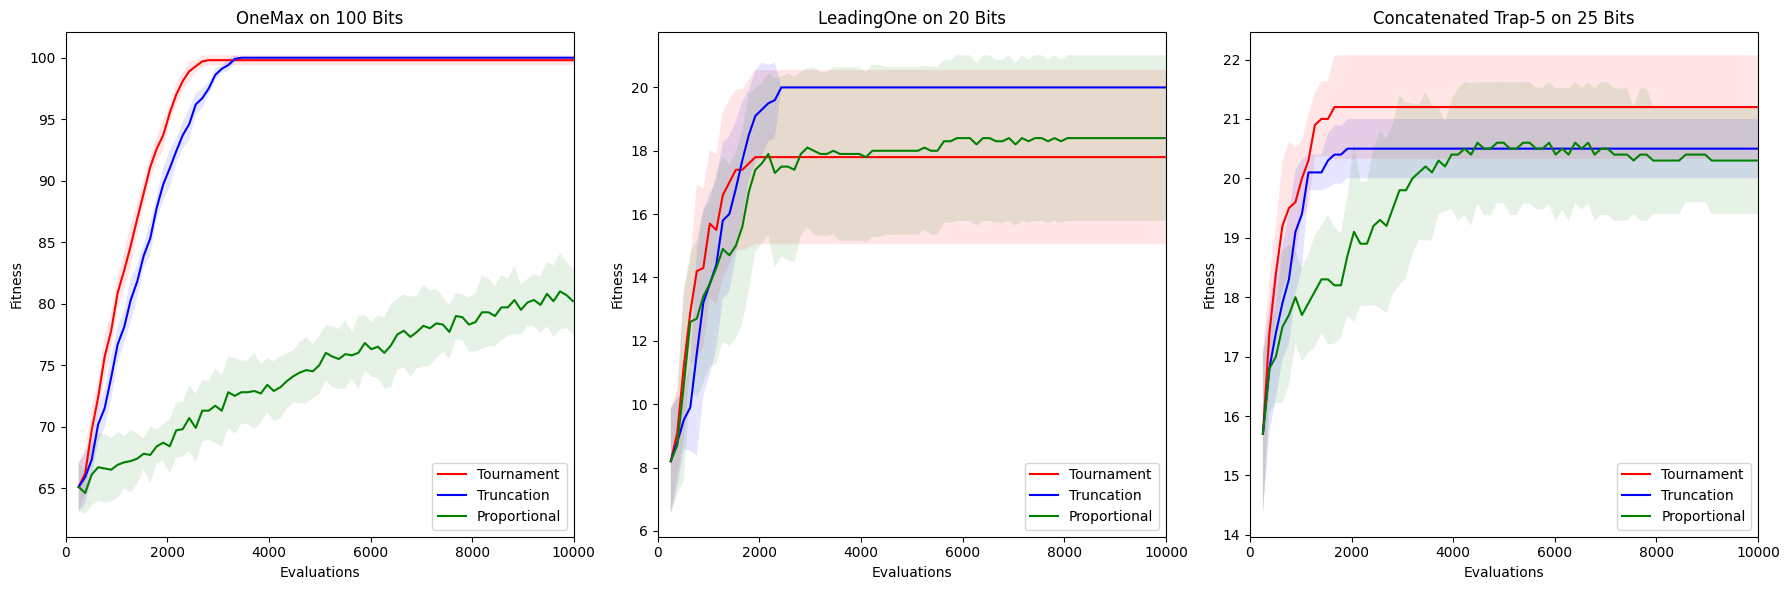

In [204]:
visualize()

# Nhận xét

- Tournament Selection (Màu đỏ)
    - Cho kết quả tốt và hội tụ nhanh chóng trên cả 3 bài toán.
    - Đặc biệt hiệu quả trên các bài toán có tính đánh lừa như Trap-5, nhờ khả năng duy trì áp lực chọn lọc mà không làm mất đa dạng sớm.
- Truncation Selection (Màu xanh dương)
	- Cho kết quả tương tự như Tournament nhưng nhỉnh hơn ở bài toán LeadingOne.
	- Do chọn lọc khắt khe nên có thể rơi vào cực trị cục bộ trên bài toán phức tạp như Trap-5.
- Proportional Selection (Màu xanh lá)
	- Có kết quả tệ nhất trong cả 3 thuật toán.
	- Khó có thể hội tụ do khả năng lựa chọn cá thể tốt nhất mang tính xác suất.
	- Đặc biệt yếu trên bài toán OneMax và Concatenated Trap-5.

# Phép chọn lọc tốt nhất là:
**Tournament Selection** vì cho kết quả tốt và ổn định nhất trên cả ba bài toán. Nó cân bằng giữa áp lực chọn lọc và khả năng duy trì đa dạng, giúp thuật toán tránh bị kẹt ở cực trị cục bộ và hội tụ hiệu quả hơn.